In [1]:
import numpy as np
from numpy import random
import hoi
import matplotlib.pyplot as plt
import xgi

c:\Users\matte\anaconda3\envs\base_mmm\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
n_features, n_samples = 3, 500

data_red = np.zeros((n_features, n_samples))

copy_variable = random.normal(loc=0.0, scale=1.0, size=n_samples)

# Create a copy of the variable in three variables + some noise
eta = 0.1

data_red[0] =  copy_variable
data_red[1] =  copy_variable + random.normal(loc=0.0, scale=1.0, size=n_samples)*eta
data_red[2] =  copy_variable + random.normal(loc=0.0, scale=1.0, size=n_samples)*eta

In [3]:
n_features, n_samples = 3, 500

data_syn = np.zeros((n_features, n_samples))

copy_variable1 = random.normal(loc=0.0, scale=1.0, size=n_samples)
copy_variable2 = random.normal(loc=0.0, scale=1.0, size=n_samples)

# Create a copy of the variable in three variables + some noise
eta = 0.1

data_syn[0] =  copy_variable1 + random.normal(loc=0.0, scale=1.0, size=n_samples)*eta
data_syn[1] =  copy_variable2 + random.normal(loc=0.0, scale=1.0, size=n_samples)*eta
data_syn[2] =  copy_variable1+copy_variable2 + random.normal(loc=0.0, scale=1.0, size=n_samples)*eta

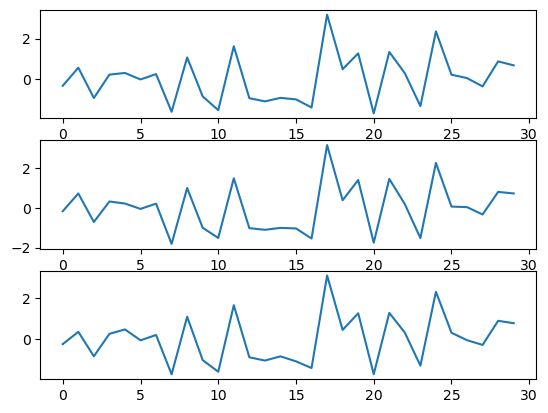

In [4]:
fig, axs = plt.subplots(3)
for i in range(3):
    axs[i].plot(data_red[i,:30])



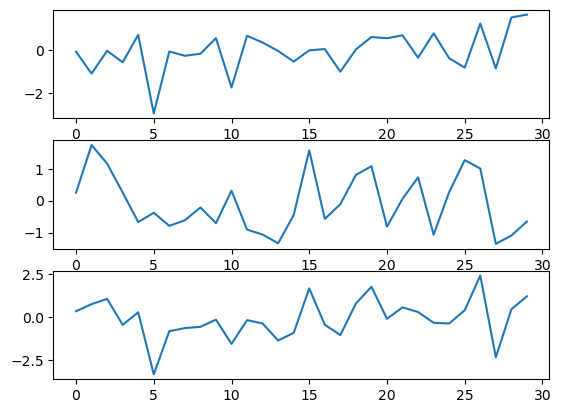

In [5]:
fig, axs = plt.subplots(3)
for i in range(3):
    axs[i].plot(data_syn[i,:30])



In [22]:
model_syn=hoi.metrics.Oinfo(data_syn.T)
oinfo_syn=model_syn.fit(minsize=3)

    Copnorm and demean the data
Get list of multiplets


In [23]:
model_red=hoi.metrics.Oinfo(data_red.T)
oinfo_red=model_red.fit(minsize=3)

    Copnorm and demean the data
Get list of multiplets


In [24]:
oinfo_syn

array([[-1.9776621]], dtype=float32)

In [25]:
oinfo_red

array([[2.8573055]], dtype=float32)

## Simulate Univariate Redundancy

A very simple way to simulate redundancy between three variables, is to copy one of the three variables in the other two. This is what is done step-by-step in the following cell. 

For further information about how to simulate redundant and synergistic interactions, check out the example: [Simulating Redundant and Synergistic Interactions](https://example.com/sphx_glr_auto_examples_tutorials_plot_sim_red_syn.py).

In [27]:

# lets start by simulating a variable x with 200 samples and 7 features
x = np.random.rand(200, 7)

# we now send the variable x1 in the column (3, 5) of x
x[:, 3] += x[:, 1]
x[:, 5] += x[:, 1]

# define the Oinfo model and launch it
model = hoi.metrics.Oinfo(x)
hoi_results = model.fit(minsize=3, maxsize=5)

# now we can take a look at the multiplets with the highest and lowest values
# of Oinfo. We will only select the multiplets of size 3 here
df = hoi.utils.get_nbest_mult(hoi_results, model=model, minsize=3, maxsize=3, n_best=3)
print(df)



    Copnorm and demean the data
Get list of multiplets
                                                           

   index  order       hoi  multiplet
0     20      3  0.182188  [1, 3, 5]
1     17      3  0.003529  [1, 2, 5]
2     33      3  0.002416  [3, 5, 6]
3     15      3 -0.001488  [1, 2, 3]
4     24      3 -0.003098  [1, 5, 6]
5     21      3 -0.004463  [1, 3, 6]


# Simulate univariate and multivariate synergy
-------------------------------------------------------------------------------

As we have already seen in the other part of the tutorial, we observe synergy
between three variables, if one variable is equal to the sum of the other two. 


In [32]:
# simulate the variable x
x = np.random.rand(200, 7)

# synergy between (0, 3, 5) and 5
x[:, 0] = x[:, 3] + x[:, 5]

# define the RSI, launch it and inspect the best multiplets
model = hoi.metrics.Oinfo(x)
hoi_results = model.fit(minsize=3, maxsize=5)
df = hoi.utils.get_nbest_mult(hoi_results, model=model, minsize=3, maxsize=3, n_best=3)
print(df)



    Copnorm and demean the data
Get list of multiplets
                                                           

   index  order       hoi  multiplet
0      3      3  0.009478  [0, 1, 5]
1     20      3  0.001273  [1, 3, 5]
2     18      3  0.000964  [1, 2, 6]
3     29      3 -0.002179  [2, 4, 6]
4      1      3 -0.023129  [0, 1, 3]
5     10      3 -1.390341  [0, 3, 5]


# Combining redundancy and synergy

In [34]:
# simulate the variable x and y
x = np.random.rand(200, 7)

# synergy between (0, 1, 2) and the first column of y
x[:, 0] = x[:, 1] + x[:, 2]

# redundancy between (3, 4, 5) and the second column of x
x[:, 4] += x[:, 3]
x[:, 5] += x[:, 3]

# define the RSI, launch it and inspect the best multiplets
model = hoi.metrics.Oinfo(x)
hoi_results = model.fit(minsize=3, maxsize=5)
df = hoi.utils.get_nbest_mult(hoi_results, model=model, minsize=3, maxsize=3, n_best=3)
print(df)



    Copnorm and demean the data
Get list of multiplets
                                                           

   index  order       hoi  multiplet
0     31      3  0.264358  [3, 4, 5]
1      7      3  0.002943  [0, 2, 5]
2      3      3  0.002636  [0, 1, 5]
3     17      3 -0.000801  [1, 2, 5]
4      8      3 -0.001164  [0, 2, 6]
5      0      3 -1.521980  [0, 1, 2]


# Plot the result at each order to observe the spreading at orders higher than 3

In [42]:
from hoi.plot import plot_landscape

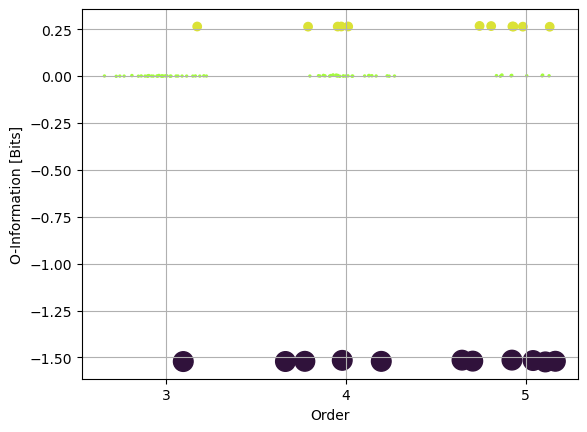

In [43]:
plot_landscape(
    hoi_results,
    model,
    kind="scatter",
    undersampling=False,
    plt_kwargs=dict(cmap="turbo"),
)
plt.show()

# Here, we use another toolbox, to plot the computed higher-order interactions

(<Axes: >,
 (<matplotlib.collections.PathCollection at 0x2935ce01450>,
  <matplotlib.collections.PatchCollection at 0x2935cd39be0>))

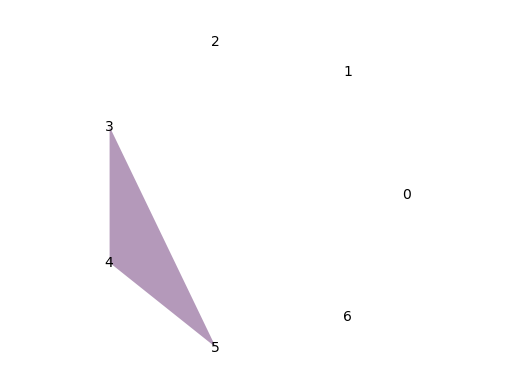

In [48]:
hype=xgi.Hypergraph()

#Here we separate the synergistic and redundant interactions
index_pos=np.where(df['hoi']>0.1)[0]
index_neg=np.where(df['hoi']<-0.1)[0]
hype.add_nodes_from(np.arange(0,7))
hype.add_edges_from(df['multiplet'][index_pos][::-1])

dict_node_labels={}
for i in range(len(hype.nodes)):
    dict_node_labels[i]=str(i)

xgi.draw(hype, pos=xgi.drawing.layout.circular_layout(hype), node_labels=dict_node_labels, edge_fc=df['hoi'][index_pos][::-1], node_size=0, edge_fc_cmap='viridis')

(<Axes: >,
 (<matplotlib.collections.PathCollection at 0x2935ce59950>,
  <matplotlib.collections.PatchCollection at 0x2935ce59a90>))

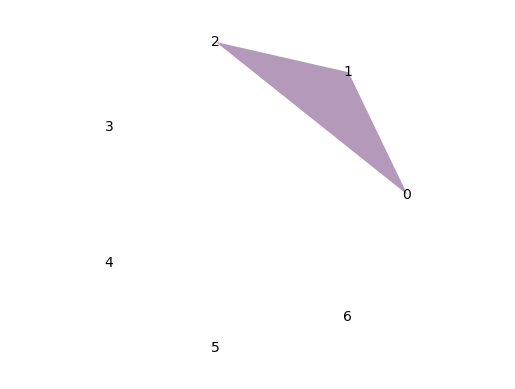

In [49]:
hype=xgi.Hypergraph()

#Here we separate the synergistic and redundant interactions
index_pos=np.where(df['hoi']>0.1)[0]
index_neg=np.where(df['hoi']<-0.1)[0]
hype.add_nodes_from(np.arange(0,7))
hype.add_edges_from(df['multiplet'][index_neg][::-1])

dict_node_labels={}
for i in range(len(hype.nodes)):
    dict_node_labels[i]=str(i)

xgi.draw(hype, pos=xgi.drawing.layout.circular_layout(hype), node_labels=dict_node_labels, edge_fc=df['hoi'][index_neg][::-1], node_size=0, edge_fc_cmap='viridis')